# Test Facies Simulations Indicators

This file is meant to demonstrate the use of gstlearn by loading a numpy array containing a facies indicator variable simulated by flumy and perform some calculations based on the grid organization (transition probabilities or connectivity)

In [1]:
# Install Flumy
# More information here : https://flumy.minesparis.psl.eu/
!python3 -m pip install flumy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Show python version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load gstlearn
from gstlearn import *
import gstlearn.plot as gp

# Load flumy
from flumy import *

## Generate a Flumy simulation
Use the default Fluvial scenario

In [3]:
nx      = 250   # Number of grid nodes along Ox
ny      = 200   # Number of grid nodes along Oy
mesh    = 10    # Horizontal grid mesh size: 10m
hmax    = 3     # Maximum channel depth: 3m
ng      = 50    # Required Net-to-Gross: 50%
isbx    = 80    # Required sand bodies extension (medium extension = few meander cutoffs)
verbose = True  # Verbose mode

res = 30            # Vertical resolution (increase 'res' to get higher resolution)
dz  = hmax / res    # Vertical discretization step (0.1m)
zul = 3 * hmax      # Fill a reservoir of 3 x hmax height (9m)
nz  = int(zul / dz) # Number of vertical nodes of the resulted block of sediments

In [4]:
# Launch the simulation
seed = 123456 # Simulation seed
# Create the simulator
flsim = Flumy(nx, ny, mesh, verbose)
# Launch up to zul
success = flsim.launch(seed, hmax, isbx, ng, zul)
if (not success):
    print("Error while running Flumy")

Flumy (7.120) / 2023/06/23 - 10:02
     Info      : Launching Flumy with: MaxDepth = 3, SandBodyIndex = 80, NetToGross = 50
     Info      : Flumy Non Expert User (old):
               :  NEXUS input:
               :   hmax=3m
               :   isbx=80
               :   sand=50%
               :   adapt_grid=0
               :  NEXUS output:
               :   width=30m
               :   e=4e-08m/s
               :   slope=0.001
               :   wavelength=375m
               :   trav=500it
               :   tlvb=280it
               :   tob=70it
               :   iob=0.1m
               :   lambda=919m
               :  Intermediate values:
               :   hmean=2m
               :   cf=0.0158(unit?)
               :   velocity=0.854666m/s
               :   lambda (raw)=900m
               :   ios=0.03m
               :   tav=365.893it
               :  Forecasts:
               :   rel_flw_dir=0deg
               :   adx=2720m
               :   forecast_sand=50%
        

     Info      : Iteration 4759 : Overbank Flow
     Info      : Iteration 4840 : Overbank Flow
     Info      : Iteration 5023 : Overbank Flow
     Info      : Iteration 5032 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      :    Local Avulsion Success - New path downstream
     Info      : Iteration 5086 : Regional Avulsion
     Info      :    Regional Avulsion Success
     Info      : Iteration 5139 : Levee Breaches (others)
     Info      :    Local Avulsion Success - New path downstream
     Info      : Iteration 5253 : Overbank Flow
     Info      : Iteration 5315 : Overbank Flow
     Info      : Iteration 5366 : Regional Avulsion
     Info      :    Regional Avulsion Success
     Info      : Iteration 5385 : Regional Avulsion
     Info      :    Regional Avulsion Success
     Info      : Iteration 5513 : Overbank Flow
     Info      : Iteration 5548 : Overbank Flow
     Info      : Iteration 5654 : Levee Breaches (other

     Info      : Iteration 10194 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      : Iteration 10307 : Overbank Flow
     Info      : Iteration 10307 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      : Iteration 10317 : Overbank Flow
     Info      : Iteration 10385 : Overbank Flow
     Info      : Iteration 10432 : Overbank Flow
     Info      : Iteration 10529 : Overbank Flow
     Info      : Iteration 10575 : Overbank Flow
     Info      : Iteration 10603 : Overbank Flow
     Info      : Iteration 10661 : Overbank Flow
     Info      : Iteration 10764 : Overbank Flow
     Info      : Iteration 10771 : Regional Avulsion
     Info      :    Regional Avulsion Success
     Info      : Iteration 10803 : Overbank Flow
     Info      : Iteration 10824 : Overbank Flow
     Info      : Iteration 10987 : Ov

     Info      : Iteration 16089 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      :    Local Avulsion Success - New path downstream
     Info      : Iteration 16122 : Overbank Flow
     Info      : Iteration 16124 : Overbank Flow
     Info      : Iteration 16283 : Overbank Flow
     Info      : Iteration 16290 : Levee Breaches (others)
     Info      : Iteration 16299 : Overbank Flow
     Info      : Iteration 16305 : Overbank Flow
     Info      : Iteration 16343 : Overbank Flow
     Info      : Iteration 16354 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      : Iteration 16368 : Overbank Flow
     Info      : Iteration 16372 : Regional Avulsion
     Info      :    Regional Avulsion Success
     Info      : Iteration 16411 : Levee Breaches (others)
     Info      :    Local Avulsion Success - Chute cutoff (no splay)
     Info      :    Local Avulsion Success - Chute

## Extract one slice from the facies array

Unique facies are  [1 2 3 5 7 8 9]


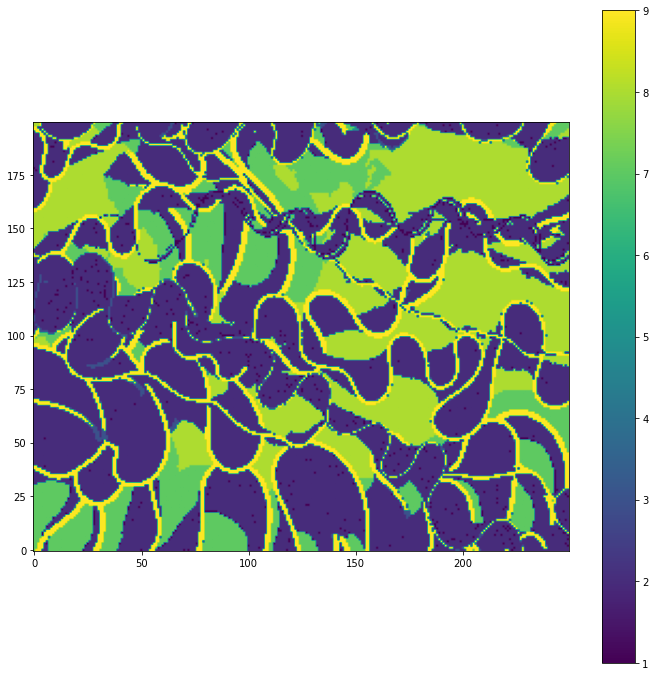

In [23]:
# Retrieve the simulated block informed with facies in a 3D numpy array
fac,grain,age = flsim.getBlock(dz, 0 ,nz)

# Get a slice
slice_idx = 20
my_slice = fac[:,:,slice_idx].T
fac_flat = my_slice.flatten()
ufacies = np.unique(fac_flat)
print("Unique facies are ", ufacies)
nfacies = len(ufacies) 
plt.rcParams["figure.figsize"] = (12,12)
plt.imshow(my_slice, origin='lower')
plt.colorbar()
plt.show()

In [24]:
# Grouping facies (see Flumy user guide appendix)
arr_flat = fac_flat
# arr_flat[arr_flat==1] = 1 # CL
# arr_flat[arr_flat==2] = 2 # PB
arr_flat[arr_flat==3]   = 2
arr_flat[arr_flat==4]   = 2
arr_flat[arr_flat==5]   = 3 # LV
arr_flat[arr_flat==6]   = 3
arr_flat[arr_flat==7]   = 3
arr_flat[arr_flat>7]    = 4 # OB

In [25]:
ufacies = np.unique(arr_flat)
print("Unique facies are ", ufacies)
nfacies = len(ufacies) 

Unique facies are  [1 2 3 4]


## Import this array in gstlearn

The Grid file is created first (defining the origin, mesh size and count). Then the facies variable is added giving the name and the locator. 

In [39]:
ndim = 2
dx = mesh
dy = mesh
defineDefaultSpace(ESpaceType.RN, ndim)
grid = DbGrid.create([nx,ny],[dx,dy],[0,0])
grid.addColumns(np.double(arr_flat), "fac", ELoc.Z)
att_simu = grid.getLastUID()
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_extend=True, flag_stats=True)
    grid.display(dbfmt)


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 50000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :     10.000    10.000
Number :        250       200

Data Base Extension
-------------------
Coor #1 - Min =      0.000 - Max =   2490.000 - Ext = 2490
Coor #2 - Min =      0.000 - Max =   1990.000 - Ext = 1990

Data Base Statistics
--------------------
1 - Name rank - Locator NA
 Nb of data          =      50000
 Nb of active values =      50000
 Minimum value       =      1.000
 Maximum value       =  50000.000
 Mean value          =  25000.500
 Standard Deviation  =  14433.757
 Variance            = 208333333.250
2 - Name x1 - Locator x1
 Nb of data          =      50000
 Nb of active values =      50000
 Minimum value       =      0.000
 Maximum value       =   24

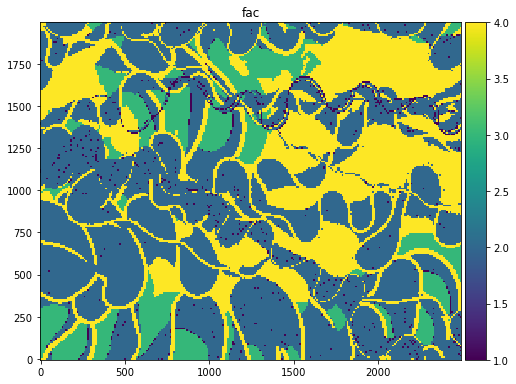

In [40]:
gp.raster(grid,name="fac",flagLegend=True)

## Proportions
Calculate facies global proportions

In [41]:
simu = arr_flat
cnt = Counter(list(simu))
props = [100*cnt[f]/(nx*ny) for f in ufacies]
sprops = ["{:.2f}%".format(p) for p in props]
facs = ["Fac{}".format(f) for f in ufacies]
df = pd.DataFrame({'Facies': facs, 'Proportions': sprops})
print("Number of Facies:", nfacies)
print(df.to_string(index=False))

Number of Facies: 4
Facies Proportions
  Fac1       1.95%
  Fac2      53.42%
  Fac3      11.88%
  Fac4      32.75%


## Transition probabilities
Calculate the transition probabilities for the 2 main directions and for each facies identifier

In [42]:
# Transform categorical variable into indicators
limits = Limits(nfacies)
if verbose:
    limits.display()
err = limits.toIndicator(grid, "fac")
grid

Bound( 1 ) : [ 0.5 ; 1.5 [
Bound( 2 ) : [ 1.5 ; 2.5 [
Bound( 3 ) : [ 2.5 ; 3.5 [
Bound( 4 ) : [ 3.5 ; 4.5 [
 


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 8
Maximum Number of UIDs       = 8
Total number of samples      = 50000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :     10.000    10.000
Number :        250       200

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = fac - Locator = NA
Column = 4 - Name = Indicator.fac.Class.1 - Locator = z1
Column = 5 - Name = Indicator.fac.Class.2 - Locator = z2
Column = 6 - Name = Indicator.fac.Class.3 - Locator = z3
Column = 7 - Name = Indicator.fac.Class.4 - Locator = z4

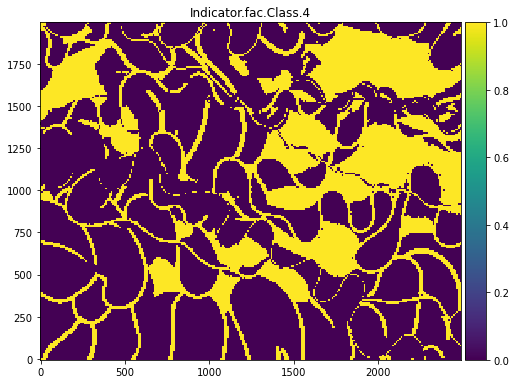

In [53]:
gp.raster(grid,name="Indicator.fac.Class.4",flagLegend=True)

In [43]:
variop = VarioParam()
dir1 = DirParam(40,dx)
dir1.setGrincr([1,0])
dir2 = DirParam(20,dx)
dir2.setGrincr([0,1])
variop.addDir(dir1)
variop.addDir(dir2)

In [44]:
vario = Vario(variop,grid)
err = vario.compute(gl.ECalcVario.TRANS1)
vario


Cross-to_simple Variogram ratio G12/G1
Number of variable(s)       = 4
Number of direction(s)      = 2
Space dimension             = 2
Variance-Covariance Matrix
               [,  0]    [,  1]    [,  2]    [,  3]
     [  0,]     0.019     0.545     0.121     0.334
     [  1,]     0.545     0.249     0.255     0.703
     [  2,]     0.121     0.255     0.105     0.372
     [  3,]     0.334     0.703     0.372     0.220

Direction #1
------------
Number of lags              = 40
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =     10.000
Tolerance on distance       =     50.000 (Percent of the lag value)
Grid Direction coefficients =          1         0

For variable 1
      Rank    Npairs  Distance     Value
         1 49800.000    10.000     0.017
         2 49600.000    20.000     0.018
         3 49400.000    30.000     0.018
         4 49200.000    40.000    

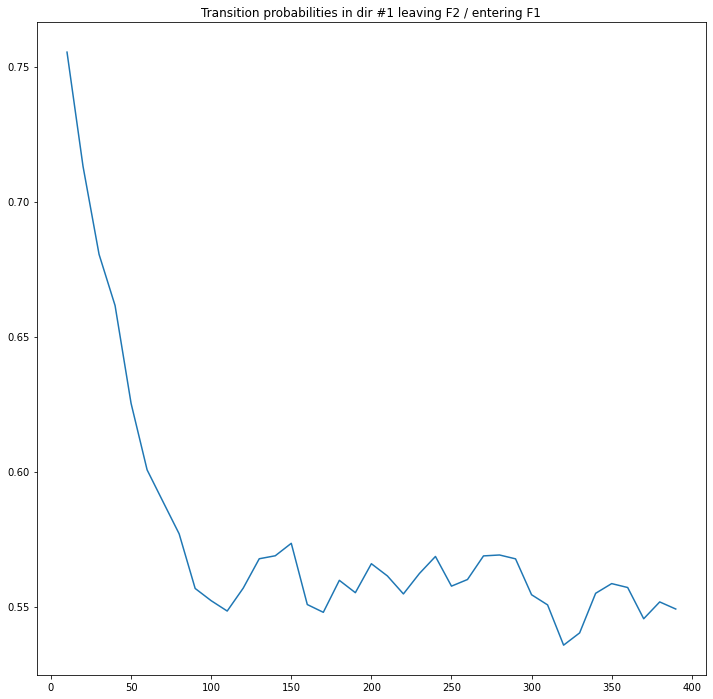

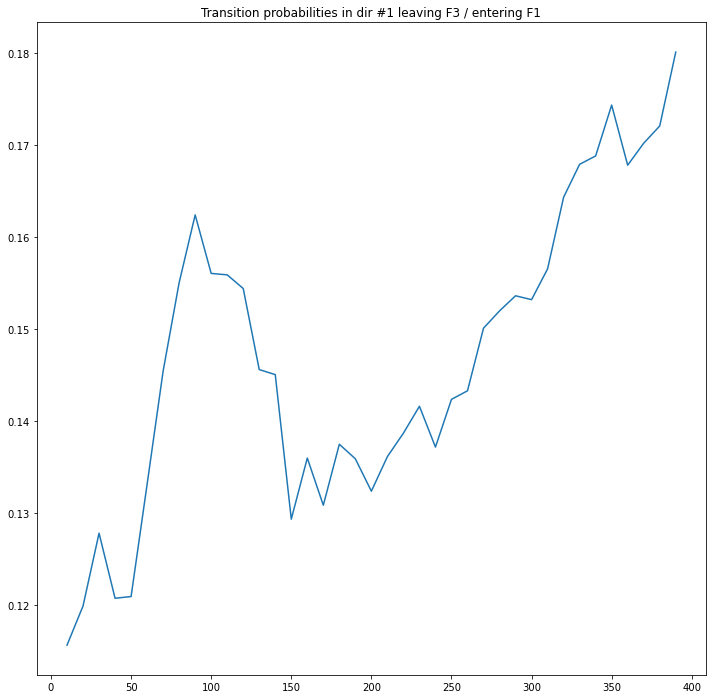

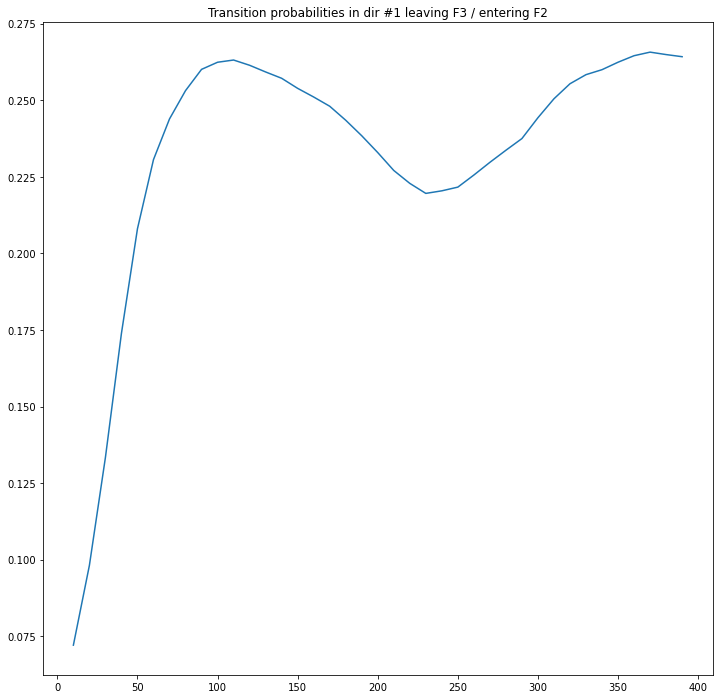

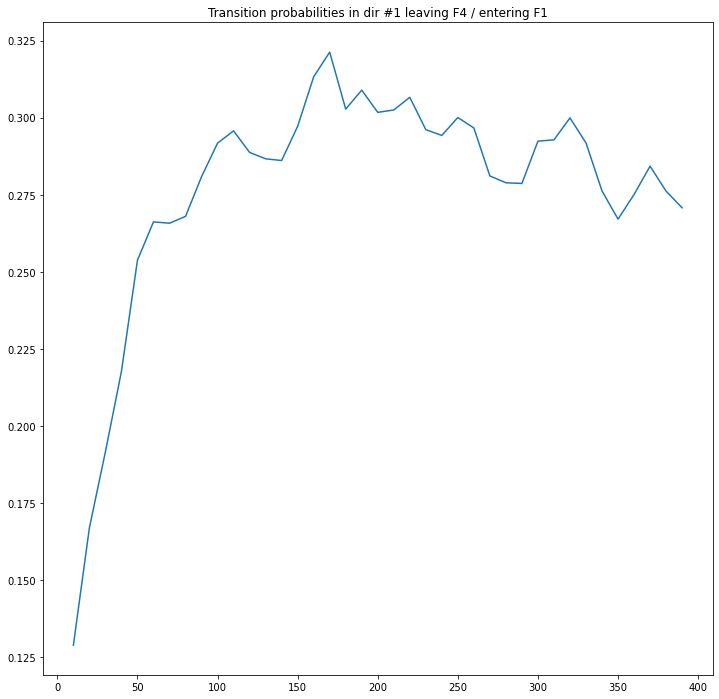

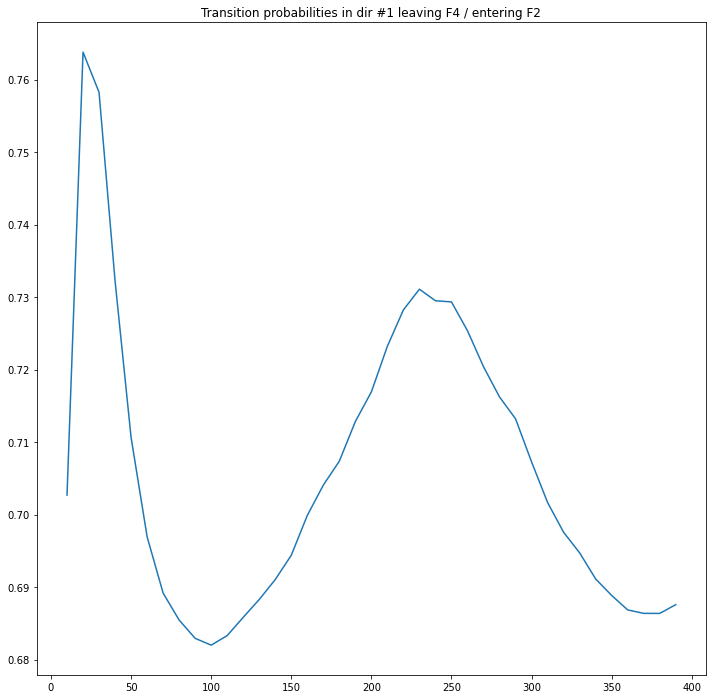

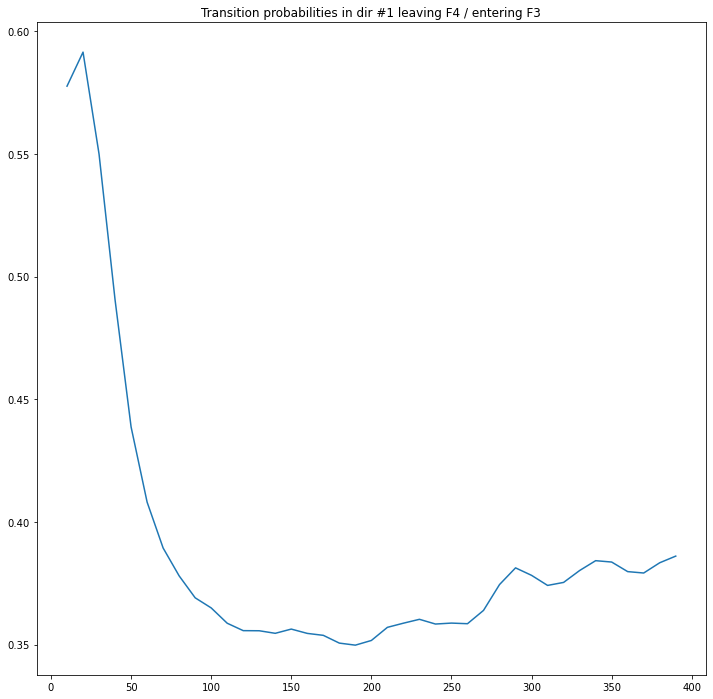

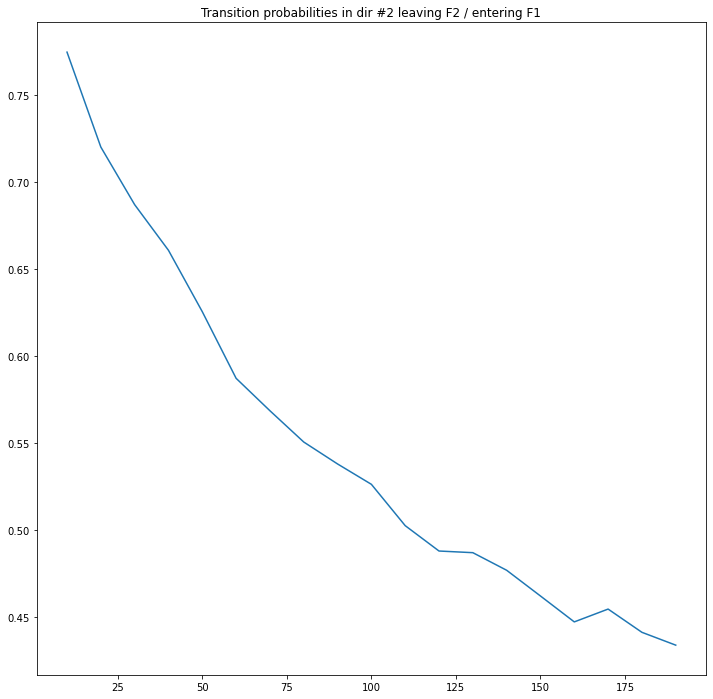

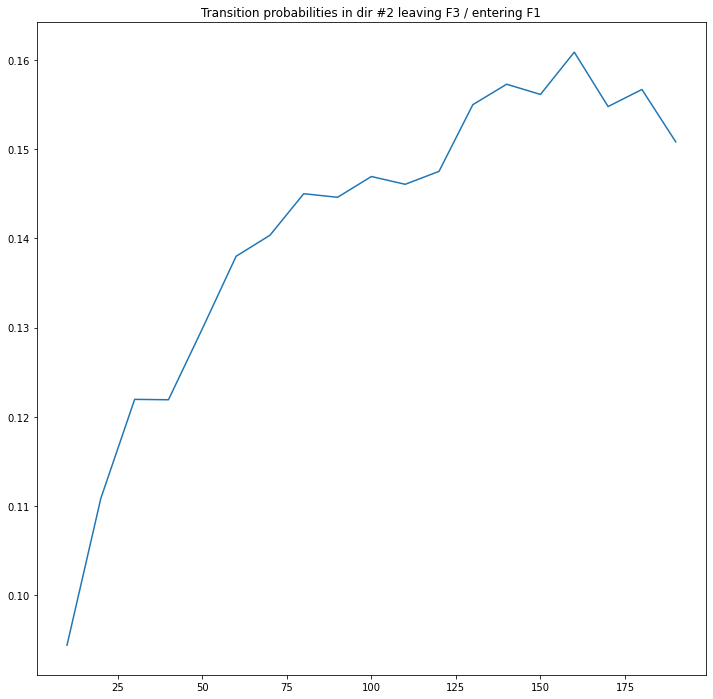

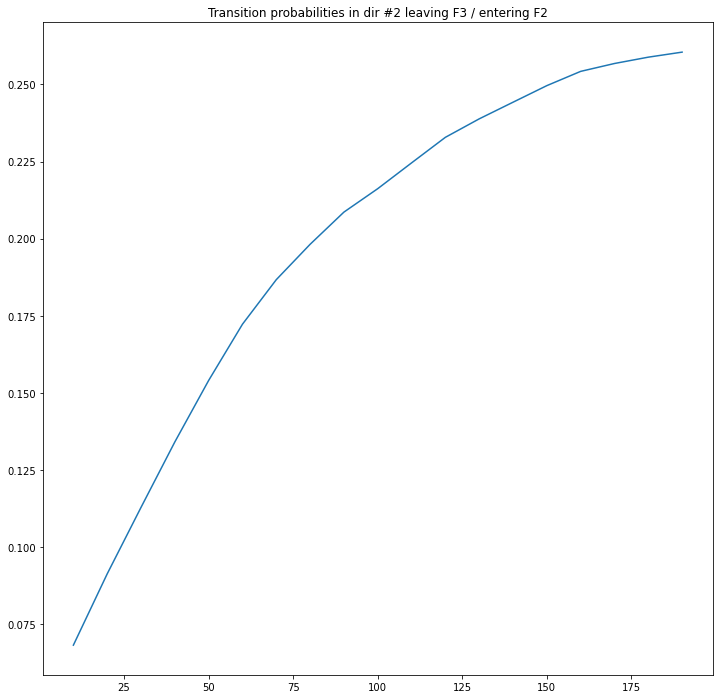

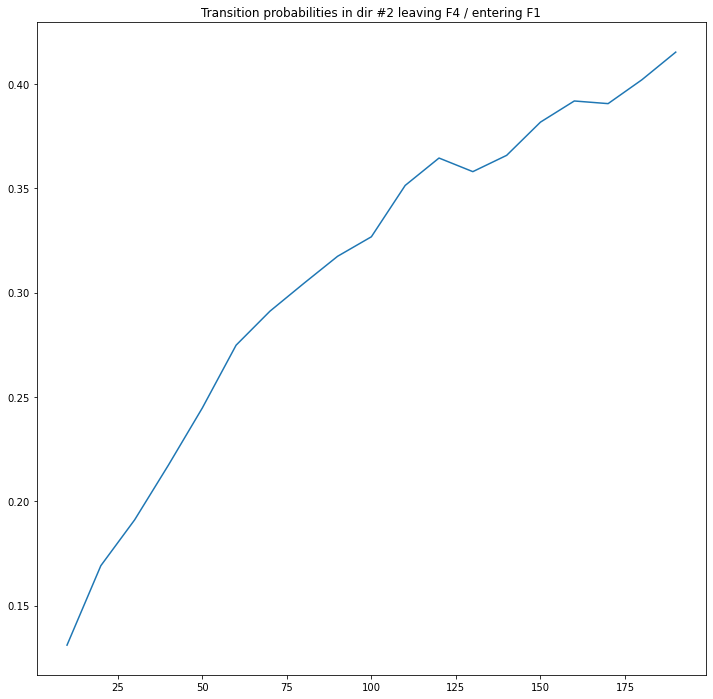

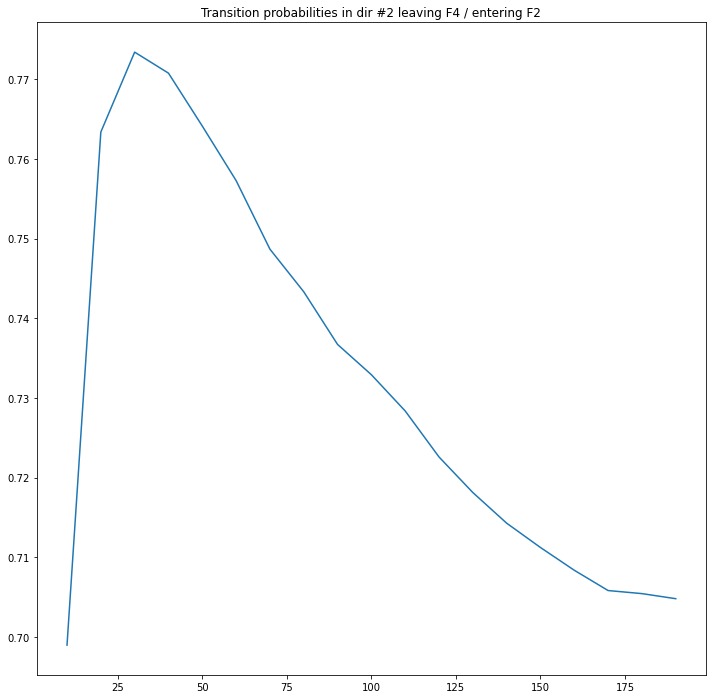

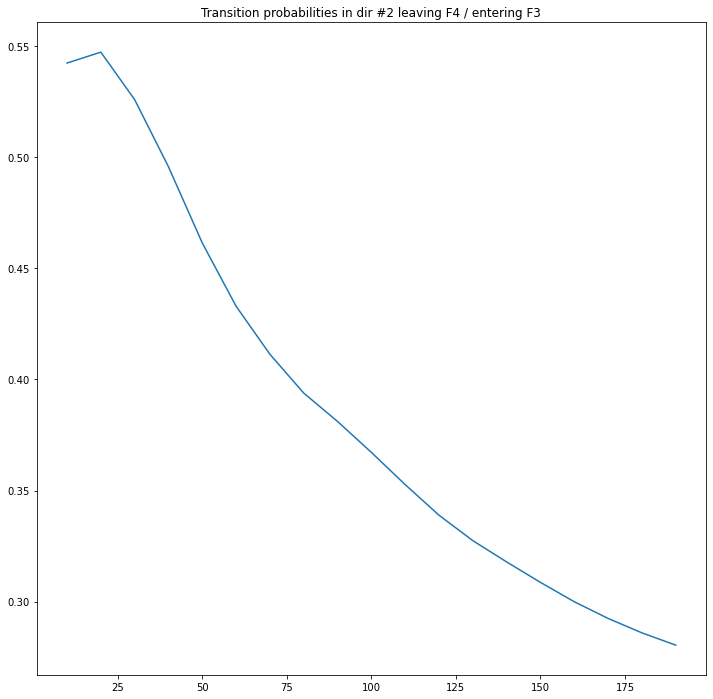

In [45]:
for idir in range(vario.getDirectionNumber()):
    for ifac in range(nfacies):
        for jfac in range(ifac):
            if ifac != jfac:
                hh = vario.getHhVec(idir,ifac,jfac)
                gg = vario.getGgVec(idir,ifac,jfac)
                plt.plot(hh,gg)
                plt.title("Transition probabilities in dir #" + str(idir+1) + " leaving F" + str(ifac+1) + " / entering F" + str(jfac+1))
                plt.show()

## Connected Components
Calculate the connected components for each facies.

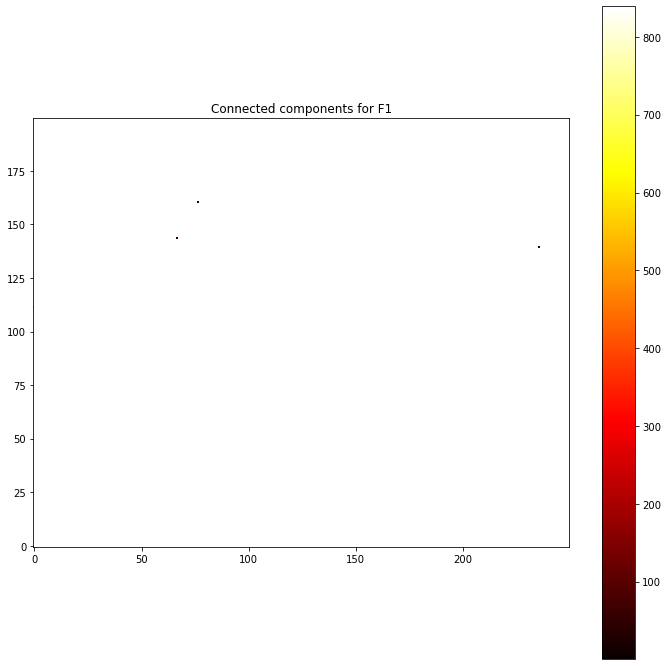

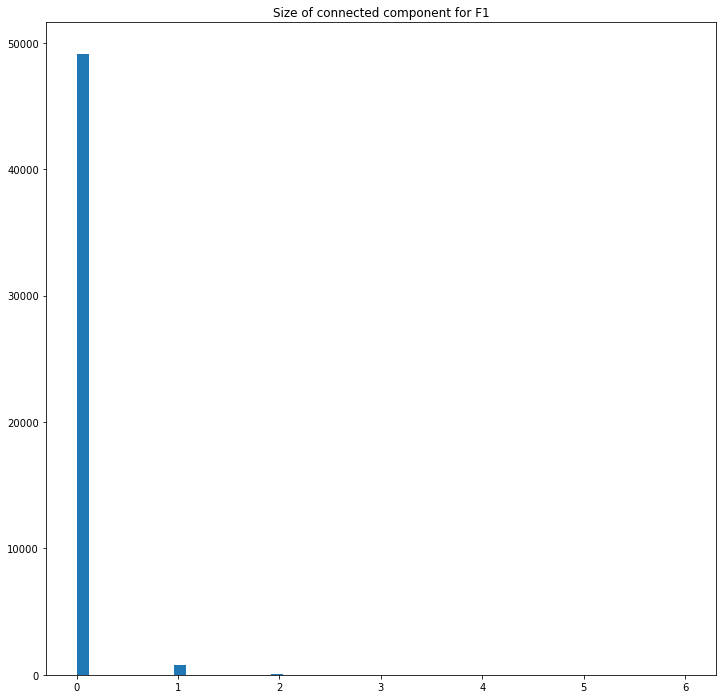

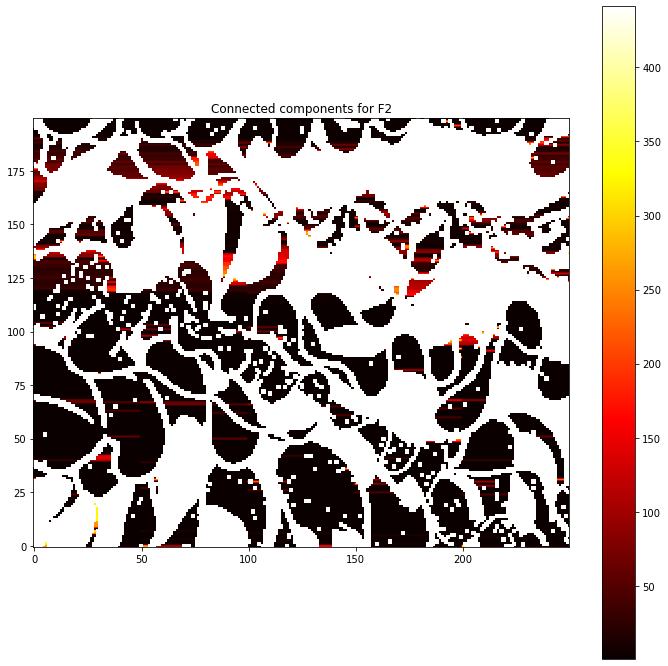

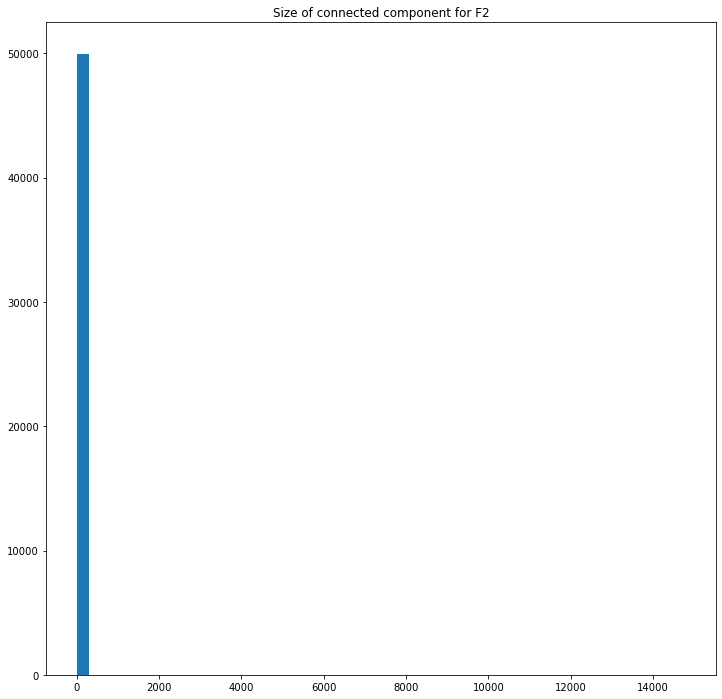

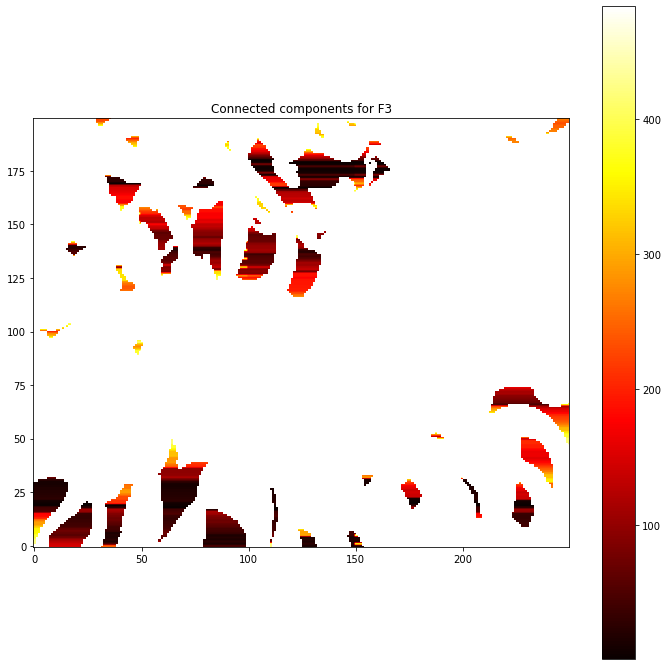

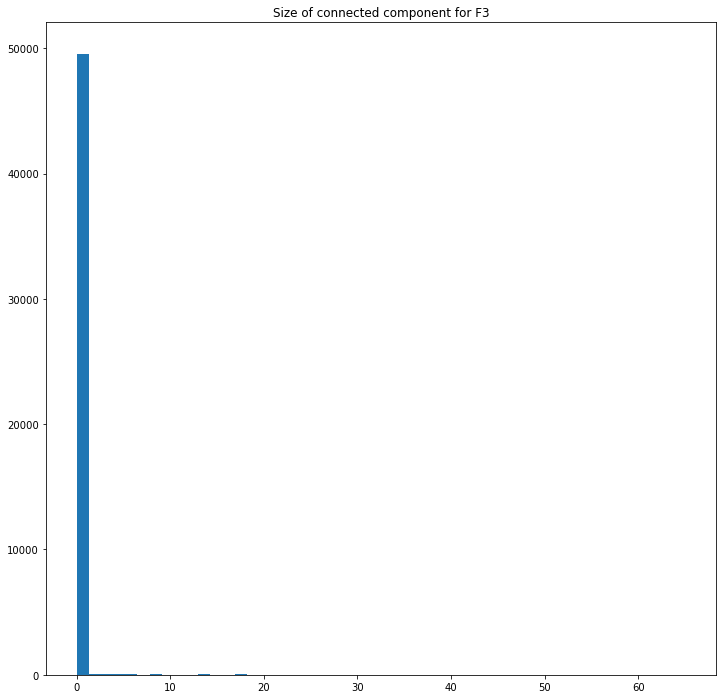

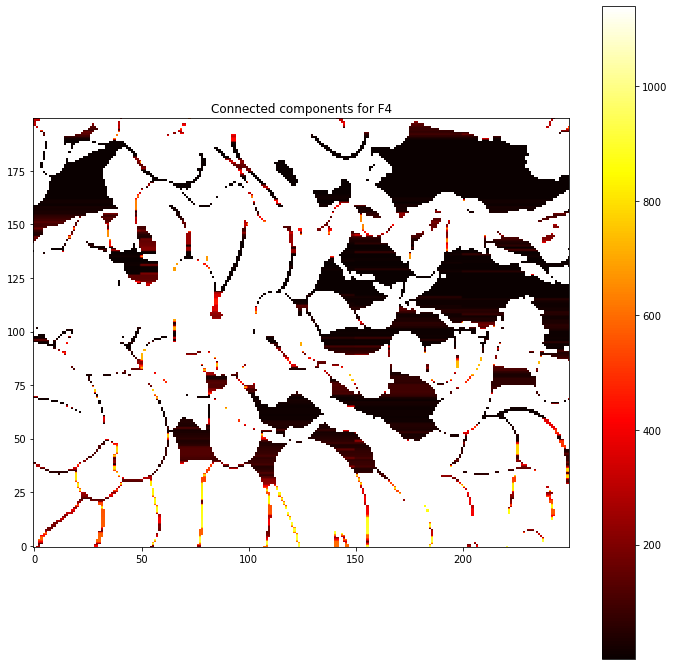

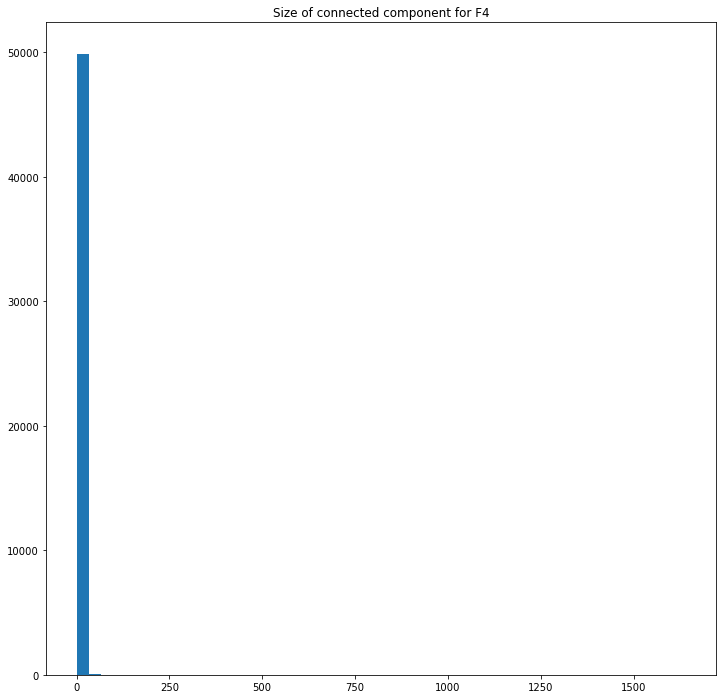

In [55]:
nxy = [ny,nx] # Transposed image for morpho* methods
eps = 0.5
compnum = grid.getColumnByUID(att_simu)
for fac in ufacies:
    vmin = fac - eps
    vmax = fac + eps
    image   = morpho_double2image(nxy,compnum,vmin,vmax);
    compnew = morpho_labelling(0,0,image,np.nan)
    sizes   = morpho_labelsize(0,image)

    plt.imshow(np.reshape(compnew, nxy), origin="lower", cmap='hot')
    plt.colorbar()
    plt.title("Connected components for F{}".format(fac))
    plt.show()

    plt.hist(sizes, bins = 50)
    plt.title("Size of connected component for F{}".format(fac))
    plt.show()